<a href="https://colab.research.google.com/github/jhnsnlim/aseng_api/blob/master/ICBP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')


In [6]:
#Load data
from google.colab import files
uploaded = files.upload()

Saving ICBP2015_20200529.csv to ICBP2015_20200529.csv


In [7]:
#Store data into data frame
df = pd.read_csv('ICBP2015_20200529.csv')
df.head(6)

,Date,Close
0,1/13/2015 15:00:00,12725
1,1/14/2015 15:00:00,12700
2,1/15/2015 15:00:00,12800
3,1/16/2015 15:00:00,12725
4,1/19/2015 15:00:00,13075
5,1/20/2015 15:00:00,13400


In [8]:
#Get the number of trading days
df.shape

(795, 2)

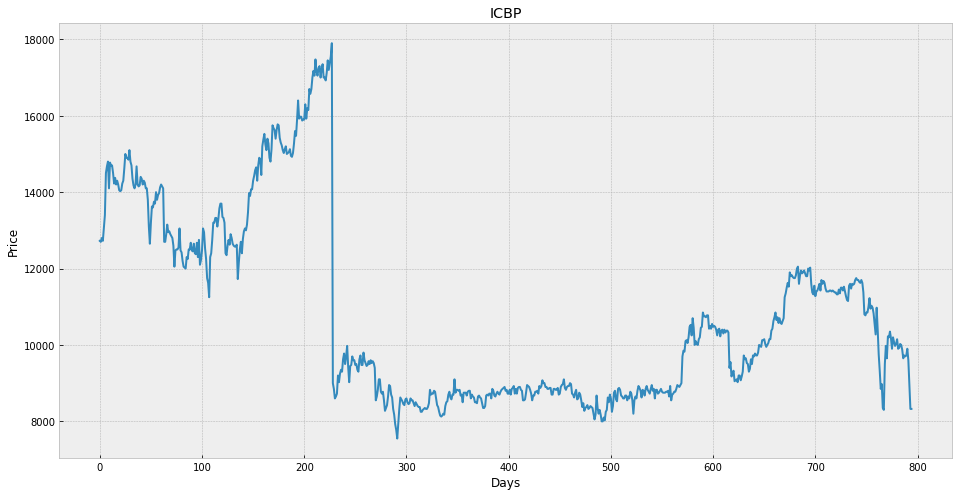

In [10]:
#Visualize the price data
plt.figure(figsize=(16,8))
plt.title('ICBP')
plt.xlabel('Days')
plt.ylabel('Price')
plt.plot(df['Close'])
plt.show()

In [23]:
#Get the close price
df = df[['Close']]
df.head(5)

,Close
0,12725
1,12700
2,12800
3,12725
4,13075


In [24]:
#Get the close price
df = df[['Close']]
df.tail(5)

,Close
790,9900
791,9600
792,8950
793,8325
794,8325


In [42]:
#Create variable to predict
future_days = 25
#Create new target column

df['Prediction'] = df[['Close']].shift(-future_days)
df.head(5)

df.drop(columns=['Prediktion'])

,Close,Prediction
0,12725,15000.0
1,12700,14900.0
2,12800,14900.0
3,12725,14850.0
4,13075,15100.0
...,...,...
790,9900,NaN
791,9600,NaN
792,8950,NaN
793,8325,NaN


In [43]:
#Create feature datas set
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[12725. 14025.]
 [12700. 14050.]
 [12800. 14225.]
 ...
 [ 8300.  9725.]
 [ 9500.  9700.]
 [ 9975.  9725.]]


In [44]:
#Create target dataset
y = np.array(df['Prediction'])[:-future_days]
print(y)

[15000. 14900. 14900. 14850. 15100. 14800. 14700. 14350. 14175. 14100.
 14200. 14675. 14200. 14150. 14175. 14400. 14350. 14200. 14300. 14250.
 14100. 14100. 13800. 13100. 12650. 13200. 13625. 13600. 13750. 13700.
 14000. 13800. 13925. 13975. 14125. 14200. 14150. 14100. 12700. 12700.
 12900. 13150. 12950. 12975. 12900. 12850. 12800. 12600. 12050. 12475.
 12500. 12500. 12550. 13050. 12475. 12425. 12200. 12050. 12025. 12000.
 12300. 12250. 12500. 12500. 12675. 12475. 12450. 12650. 12400. 12375.
 12675. 12300. 12750. 12100. 12225. 12475. 13050. 12950. 12525. 12250.
 11750. 11625. 11250. 12300. 12400. 12750. 13200. 13200. 13325. 13325.
 13100. 13300. 13575. 13700. 13700. 13350. 13325. 13200. 12400. 12350.
 12600. 12750. 12625. 12900. 12800. 12650. 12600. 12575. 12575. 12625.
 11725. 12150. 12500. 12700. 12400. 12775. 12975. 13050. 13000. 13150.
 13475. 13975. 13900. 14075. 14075. 14300. 14425. 14575. 14650. 14300.
 14700. 14900. 14850. 14450. 15200. 15375. 15525. 15250. 15100. 15400.
 15275

In [0]:
#Split data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [0]:
#Create Decision Tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create Regression Model
lr = LinearRegression().fit(x_train, y_train)

In [47]:
#Get the last row of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[11700.,  8975.],
       [11625.,  8350.],
       [11375.,  8300.],
       [10800.,  9500.],
       [10775.,  9975.],
       [10850.,  9650.],
       [10850., 10225.],
       [11000., 10200.],
       [11225., 10350.],
       [10950., 10175.],
       [11025.,  9900.],
       [10975., 10200.],
       [10825., 10075.],
       [10550.,  9975.],
       [10275., 10025.],
       [10975., 10150.],
       [10400.,  9900.],
       [ 9750.,  9925.],
       [ 9325., 10025.],
       [ 8850., 10000.],
       [ 8975.,  9875.],
       [ 8350.,  9650.],
       [ 8300.,  9725.],
       [ 9500.,  9700.],
       [ 9975.,  9725.]])

In [48]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[ 9650. 10225. 10200. 10350. 10175. 10350. 10200. 10075.  9975. 10025.
 10150.  9900.  9925.  9650. 10000. 10025.  9650.  9725. 10475. 10200.
 10475.  9600.  8950.  9725.  8325.]

[ 9076.17826774  8483.35168333  8431.03618919  9554.85562819
 10003.76068429  9697.77523696 10241.79304564 10221.14585608
 10367.57218325 10196.49098833  9937.8114374  10220.6448963
 10099.37439665  9999.25204633 10041.04738523 10173.3389999
  9925.28744308  9935.91543719 10022.01091386  9988.83972997
  9873.07978782  9647.67925966  9717.63618473  9718.02930562
  9751.20048951]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


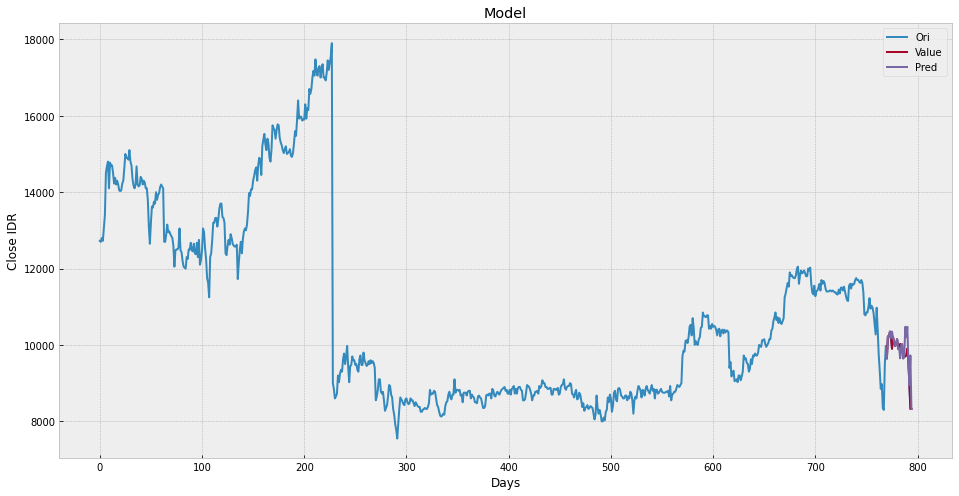

In [49]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close IDR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Ori', 'Value', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


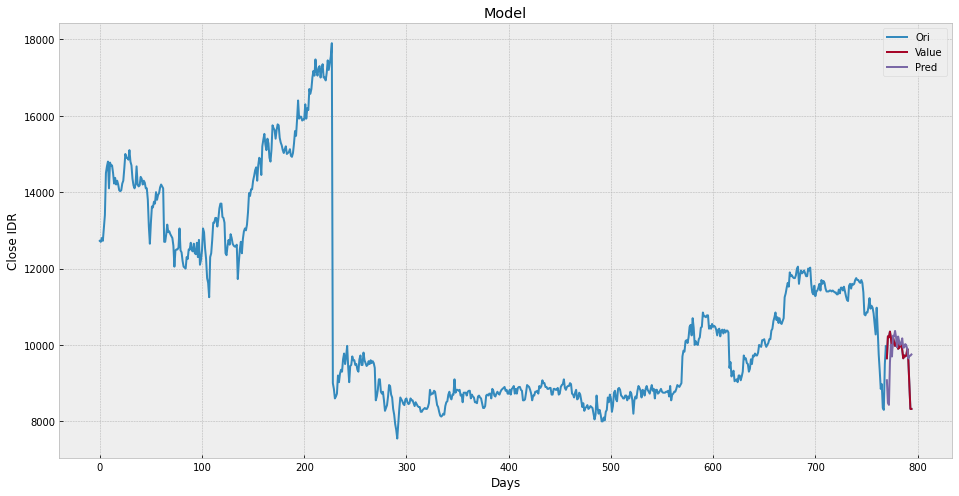

In [50]:
#Visualize the data Linear Regression
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Prediction'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close IDR')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Prediction']])
plt.legend(['Ori', 'Value', 'Pred'])
plt.show()